In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def plot_series(time, series, start = 0, end = None, label = None):
    plt.plot(time[start:end], series[start:end], label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi), 1/np.exp(3 * season_time))

def seasonality(time, period, amplitude = 1, phase = 0):
    season_time = ((time + phase)%period)/period
    return seasonal_pattern(season_time) * amplitude

def white_noise(time, noise_level = 1, seed = None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

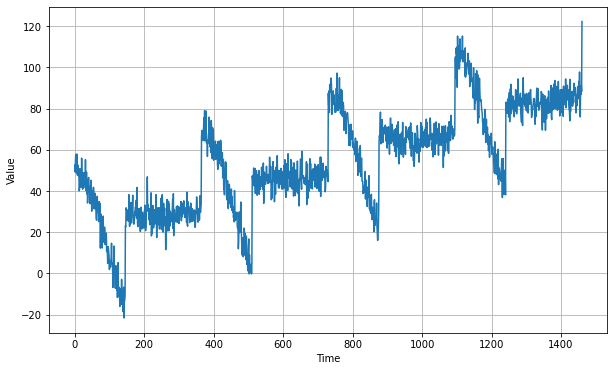

In [3]:
time = np.arange(4 * 365 + 1)
slope = 0.05
baseline = 10
noise_level = 5
noise = white_noise(time, noise_level, seed = 42)
series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude=40) + noise
plt.figure(figsize=(10,6))
plot_series(time, series, label="Time Series Forecasting")
plt.show()

# Forecasting wth Machine Learning

In [4]:
def window_dataset(series, window_size, batch_size = 32, shuffle_buffer = 1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift = 1, drop_remainder = True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [5]:
split = 1000
train_time = time[:split]
x_train = series[:split]
time_valid = time[split:]
x_valid = series[split:]

# Linear Model

In [6]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

#making the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units =1, input_shape = (30,30)))
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9), loss=tf.keras.losses.Huber(), metrics=["mae"])  \
#1e-5 is a constant defined term, it is basically 0.00001

#Training the model
model.fit(train_set, epochs=100, validation_data=valid_set)

Epoch 1/100
      1/Unknown - 1s 665ms/step - loss: 94.2422 - mae: 94.7422WARNING:tensorflow:Model was constructed with shape (None, 30, 30) for input KerasTensor(type_spec=TensorSpec(shape=(None, 30, 30), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'"), but it was called on an input with incompatible shape (None, None).
31/31 [==============================] - 1s 18ms/step - loss: 46.6813 - mae: 47.1784 - val_loss: 23.1475 - val_mae: 23.6473
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 11.9123 - mae: 12.4017 - val_loss: 10.6108 - val_mae: 11.0934
Epoch 3/100
31/31 [==============================] - 0s 6ms/step - loss: 10.2063 - mae: 10.6947 - val_loss: 9.1115 - val_mae: 9.6013
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 9.8053 - mae: 10.2898 - val_loss: 9.0103 - val_mae: 9.4965
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 9.7068 - mae: 10.1940 -

31/31 [==============================] - 0s 4ms/step - loss: 6.0764 - mae: 6.5575 - val_loss: 6.0446 - val_mae: 6.5258
Epoch 56/100
31/31 [==============================] - 0s 5ms/step - loss: 6.0693 - mae: 6.5438 - val_loss: 5.9976 - val_mae: 6.4784
Epoch 57/100
31/31 [==============================] - 0s 4ms/step - loss: 5.9879 - mae: 6.4677 - val_loss: 6.5870 - val_mae: 7.0729
Epoch 58/100
31/31 [==============================] - 0s 4ms/step - loss: 5.9670 - mae: 6.4472 - val_loss: 6.2659 - val_mae: 6.7540
Epoch 59/100
31/31 [==============================] - 0s 4ms/step - loss: 5.9528 - mae: 6.4379 - val_loss: 5.9457 - val_mae: 6.4270
Epoch 60/100
31/31 [==============================] - 0s 4ms/step - loss: 5.8707 - mae: 6.3552 - val_loss: 5.9626 - val_mae: 6.4462
Epoch 61/100
31/31 [==============================] - 0s 4ms/step - loss: 5.8656 - mae: 6.3480 - val_loss: 6.0507 - val_mae: 6.5383
Epoch 62/100
31/31 [==============================] - 0s 4ms/step - loss: 5.8503 - mae: 6

In [7]:
window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

#making the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units =1, input_shape = (30,30)))
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9), loss=tf.keras.losses.Huber(), metrics=["mae"])  \
#1e-5 is a constant defined term, it is basically 0.00001
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch / 30))
#Training the model
model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 1s 2ms/step - loss: 21.9626 - mae: 22.4588
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 11.6828 - mae: 12.1723
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 8.6972 - mae: 9.1868
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 8.6367 - mae: 9.1216
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 8.6139 - mae: 9.0989
Epoch 6/100
31/31 [==============================] - 0s 861us/step - loss: 8.6003 - mae: 9.0850
Epoch 7/100
31/31 [==============================] - 0s 955us/step - loss: 8.5812 - mae: 9.0667
Epoch 8/100
31/31 [==============================] - 0s 717us/step - loss: 8.5647 - mae: 9.0498
Epoch 9/100
31/31 [==============================] - ETA: 4s - loss: 6.5632 - mae: 7.041 - 0s 1ms/step - loss: 8.5418 - mae: 9.0271
Epoch 10/100
31/31 [==============================] - 0s 850us/step - loss: 8.5249 - mae: 9.0106
Epoch 11/

31/31 [==============================] - 0s 1ms/step - loss: 9.0925 - mae: 9.5818
Epoch 79/100
31/31 [==============================] - 0s 1ms/step - loss: 7.5257 - mae: 8.0108
Epoch 80/100
31/31 [==============================] - 0s 576us/step - loss: 6.1038 - mae: 6.5881
Epoch 81/100
31/31 [==============================] - 0s 1ms/step - loss: 6.3321 - mae: 6.8130
Epoch 82/100
31/31 [==============================] - ETA: 3s - loss: 14.5874 - mae: 15.078 - 0s 571us/step - loss: 21.4552 - mae: 21.9519
Epoch 83/100
31/31 [==============================] - 0s 634us/step - loss: 14.9012 - mae: 15.3955
Epoch 84/100
31/31 [==============================] - 0s 1ms/step - loss: 32.2124 - mae: 32.7093
Epoch 85/100
31/31 [==============================] - 0s 808us/step - loss: 31.1150 - mae: 31.6110
Epoch 86/100
31/31 [==============================] - 0s 667us/step - loss: 22.0767 - mae: 22.5688
Epoch 87/100
31/31 [==============================] - 0s 1ms/step - loss: 33.2666 - mae: 33.7649
E

# Early Stopping

In [8]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [window_size]))
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),optimizer=optimizer,metrics=["mae"])
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 10)
model.fit(train_set, epochs = 100, validation_data=valid_set, callbacks=[early_stopping])

Epoch 1/100


C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


31/31 [==============================] - 1s 7ms/step - loss: 46.6813 - mae: 47.1784 - val_loss: 23.1475 - val_mae: 23.6473
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 11.9123 - mae: 12.4017 - val_loss: 10.6108 - val_mae: 11.0934
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 10.2063 - mae: 10.6947 - val_loss: 9.1115 - val_mae: 9.6013
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 9.8053 - mae: 10.2898 - val_loss: 9.0103 - val_mae: 9.4965
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 9.7068 - mae: 10.1940 - val_loss: 8.9696 - val_mae: 9.4569
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 9.5858 - mae: 10.0706 - val_loss: 9.2814 - val_mae: 9.7695
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 9.5716 - mae: 10.0561 - val_loss: 8.7506 - val_mae: 9.2409
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 9.4335 -

31/31 [==============================] - 0s 4ms/step - loss: 5.7668 - mae: 6.2473 - val_loss: 5.8891 - val_mae: 6.3675
Epoch 64/100
31/31 [==============================] - 0s 5ms/step - loss: 5.7735 - mae: 6.2540 - val_loss: 5.7918 - val_mae: 6.2716
Epoch 65/100
31/31 [==============================] - 0s 5ms/step - loss: 5.7196 - mae: 6.1992 - val_loss: 5.7822 - val_mae: 6.2677
Epoch 66/100
31/31 [==============================] - 0s 4ms/step - loss: 5.7195 - mae: 6.2001 - val_loss: 5.8370 - val_mae: 6.3169
Epoch 67/100
31/31 [==============================] - 0s 5ms/step - loss: 5.7116 - mae: 6.1953 - val_loss: 5.8026 - val_mae: 6.2866
Epoch 68/100
31/31 [==============================] - 0s 4ms/step - loss: 5.6455 - mae: 6.1273 - val_loss: 5.8970 - val_mae: 6.3825
Epoch 69/100
31/31 [==============================] - 0s 4ms/step - loss: 5.5995 - mae: 6.0752 - val_loss: 6.1008 - val_mae: 6.5871
Epoch 70/100
31/31 [==============================] - 0s 4ms/step - loss: 5.6110 - mae: 6

In [21]:
#Making a function to use model for making predictions
def model_forecast(model, series, window_size):
    Dataset = tf.data.Dataset.from_tensor_slices(series)
    Dataset = Dataset.window(window_size, shift = 1, drop_remainder = True) #Here we dont need to add 1 to window size as it will cause error
    Dataset = Dataset.flat_map(lambda w: w.batch(window_size))
    Dataset = Dataset.batch(32).prefetch(1)
    forecast = model.predict(Dataset)
    return forecast

In [51]:
linear_forecast = model_forecast(model, series[split-30:-1], window_size)[:, 0]

In [52]:
linear_forecast.shape #Since here the shape is large so we can minimize it by using slicing in series

(461,)

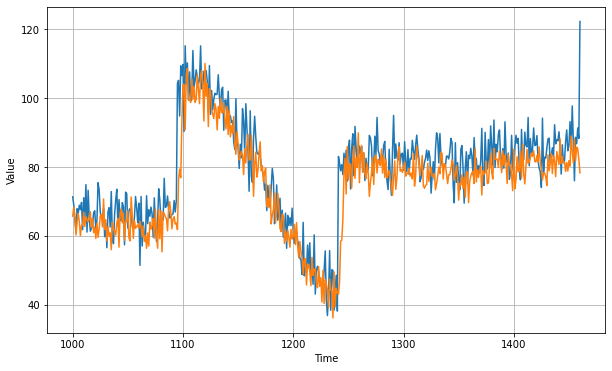

In [53]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid,linear_forecast)

In [54]:
tf.keras.metrics.mean_absolute_error(x_valid, linear_forecast).numpy()

6.097049

In [60]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/500
31/31 [==============================] - 1s 8ms/step - loss: 20.4049 - mae: 20.8986 - val_loss: 9.5125 - val_mae: 10.0037
Epoch 2/500
31/31 [==============================] - 0s 4ms/step - loss: 8.6179 - mae: 9.1027 - val_loss: 7.5804 - val_mae: 8.0585
Epoch 3/500
31/31 [==============================] - 0s 4ms/step - loss: 7.9849 - mae: 8.4702 - val_loss: 7.2411 - val_mae: 7.7189
Epoch 4/500
31/31 [==============================] - 0s 4ms/step - loss: 7.6780 - mae: 8.1603 - val_loss: 7.0971 - val_mae: 7.5798
Epoch 5/500
31/31 [==============================] - 0s 4ms/step - loss: 7.4285 - mae: 7.9136 - val_loss: 6.6877 - val_mae: 7.1663
Epoch 6/500
31/31 [==============================] - 0s 4ms/step - loss: 7.2165 - mae: 7.6989 - val_loss: 6.7449 - val_mae: 7.2319
Epoch 7/500
31/31 [==============================] - 0s 4ms/step - loss: 7.0491 - mae: 7.5318 - val_loss: 6.3436 - val_mae: 6.8156
Epoch 8/500
31/31 [==============================] - 0s 4ms/step - loss: 6.9028 

31/31 [==============================] - 0s 6ms/step - loss: 5.1874 - mae: 5.6697 - val_loss: 5.0692 - val_mae: 5.5508
Epoch 64/500
31/31 [==============================] - 0s 6ms/step - loss: 5.1751 - mae: 5.6555 - val_loss: 5.2834 - val_mae: 5.7662
Epoch 65/500
31/31 [==============================] - 0s 5ms/step - loss: 5.2088 - mae: 5.6886 - val_loss: 5.0484 - val_mae: 5.5301
Epoch 66/500
31/31 [==============================] - 0s 5ms/step - loss: 5.1744 - mae: 5.6535 - val_loss: 5.1831 - val_mae: 5.6589
Epoch 67/500
31/31 [==============================] - 0s 5ms/step - loss: 5.1534 - mae: 5.6338 - val_loss: 5.0369 - val_mae: 5.5184
Epoch 68/500
31/31 [==============================] - 0s 4ms/step - loss: 5.1575 - mae: 5.6382 - val_loss: 5.0227 - val_mae: 5.5027
Epoch 69/500
31/31 [==============================] - 0s 6ms/step - loss: 5.1541 - mae: 5.6362 - val_loss: 5.1051 - val_mae: 5.5804
Epoch 70/500
31/31 [==============================] - 0s 5ms/step - loss: 5.1305 - mae: 5

Epoch 125/500
31/31 [==============================] - 0s 4ms/step - loss: 4.7814 - mae: 5.2602 - val_loss: 4.7709 - val_mae: 5.2495
Epoch 126/500
31/31 [==============================] - 0s 5ms/step - loss: 4.7547 - mae: 5.2327 - val_loss: 4.7648 - val_mae: 5.2428
Epoch 127/500
31/31 [==============================] - 0s 4ms/step - loss: 4.7337 - mae: 5.2090 - val_loss: 4.8925 - val_mae: 5.3660
Epoch 128/500
31/31 [==============================] - 0s 4ms/step - loss: 4.7231 - mae: 5.2004 - val_loss: 4.7861 - val_mae: 5.2643
Epoch 129/500
31/31 [==============================] - 0s 4ms/step - loss: 4.7312 - mae: 5.2095 - val_loss: 4.7655 - val_mae: 5.2437
Epoch 130/500
31/31 [==============================] - 0s 5ms/step - loss: 4.7267 - mae: 5.2040 - val_loss: 4.7819 - val_mae: 5.2601
Epoch 131/500
31/31 [==============================] - 0s 5ms/step - loss: 4.8444 - mae: 5.3232 - val_loss: 4.9965 - val_mae: 5.4721
Epoch 132/500
31/31 [==============================] - 0s 5ms/step - 

In [62]:
dense_forecast = model_forecast(
    model,
    series[split - window_size:-1],
    window_size)[:, 0]

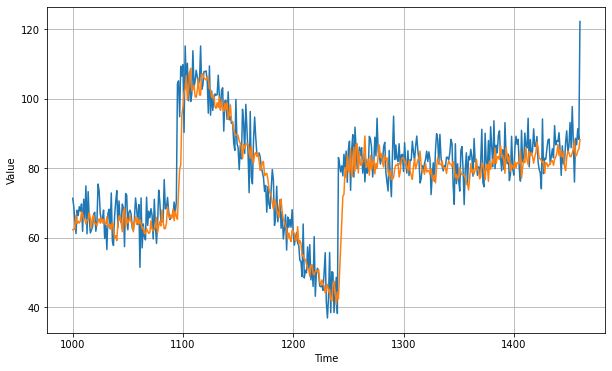

In [63]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dense_forecast)

In [65]:
tf.keras.metrics.mean_absolute_error(x_valid, dense_forecast).numpy()

5.202555